In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# 1. Download data
end = pd.Timestamp.today().normalize()
btc = yf.download("BTC-USD", start=end - pd.Timedelta(days=365), end=end)
spx = yf.download("^GSPC", start=end - pd.Timedelta(days=365), end=end)

# 2. Align trading days
#    BTC has weekend data; we drop days where SPX is NaN
df = pd.concat(
    [btc['Close'], spx['Close']],
    axis=1, 
    keys=['BTC','SPX']
).dropna()



df['BTC_returns'] = df['BTC'].pct_change()
df['SPX_returns'] = df['SPX'].pct_change()
df.dropna(inplace=True)

df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,BTC,SPX,BTC_returns,SPX_returns
Ticker,BTC-USD,^GSPC,,
Date,,,,
2024-04-30,60636.855469,5035.689941,-0.050191,-0.015731
2024-05-01,58254.011719,5018.390137,-0.039297,-0.003435
2024-05-02,59123.433594,5064.200195,0.014925,0.009128
2024-05-03,62889.835938,5127.790039,0.063704,0.012557
2024-05-06,63161.949219,5180.740234,0.004327,0.010326
...,...,...,...,...
2025-04-21,87518.906250,5158.200195,0.030899,-0.023567
2025-04-22,93441.890625,5287.759766,0.067677,0.025117


In [14]:
# 5. Scatter + regression plots
for window in [30, 60, 90, 180]:

    btc_rolling = df['BTC_returns'].rolling(window).corr(df['SPX_returns']).values
    cov = df['BTC_returns'].rolling(window).cov(df['SPX_returns']).values
    var = df['SPX_returns'].rolling(window).var().values
    beta = cov / var

    slope, intercept, r_val, p_val, std_err = linregress(sub['SPX'], sub['BTC'])
    
    plt.figure(figsize=(6,4))
    plt.scatter(sub['SPX'], sub['BTC'], alpha=0.6, label=f'r={corr:.2f}')
    x = np.linspace(sub['SPX'].min(), sub['SPX'].max(), 100)
    plt.plot(x, intercept + slope*x, 'r', label=f'beta≈{beta:.2f}')
    plt.title(f'BTC vs SPX Returns ({label})')
    plt.xlabel('SPX daily return')
    plt.ylabel('BTC daily return')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


KeyError: 'SPX'

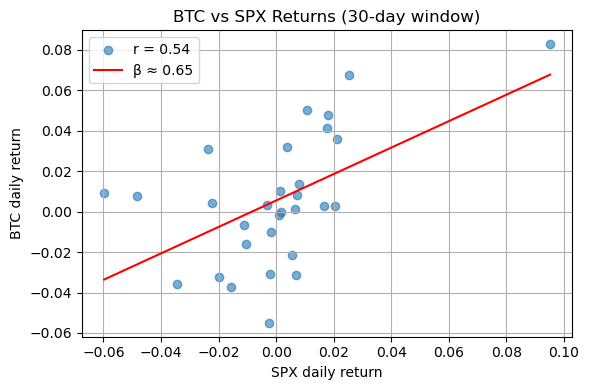

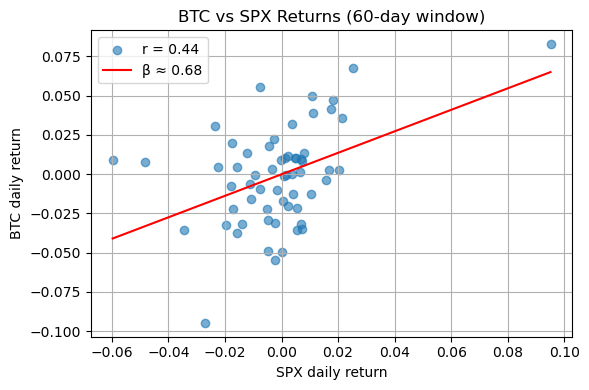

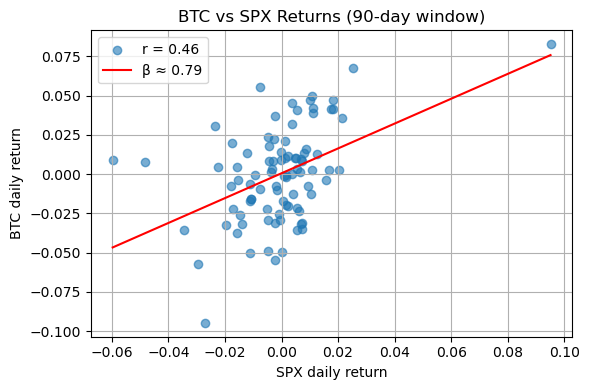

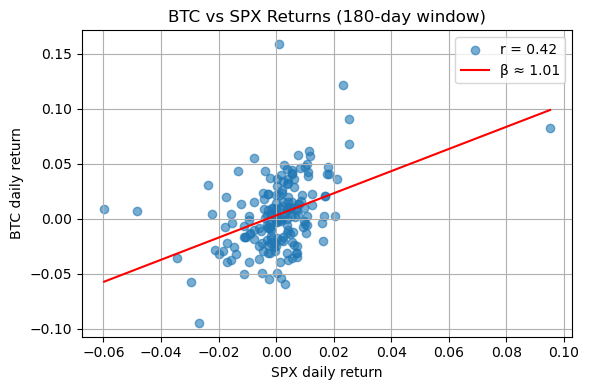

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# 5. Scatter + regression plots for multiple windows
for window in [30, 60, 90, 180]:
    # take the last N rows of returns
    sub = df[['BTC_returns', 'SPX_returns']].tail(window)
    
    # scalar stats for this window
    corr    = sub['BTC_returns'].corr(sub['SPX_returns'])
    cov      = sub[['BTC_returns', 'SPX_returns']].cov().iloc[0,1]
    var_spx  = sub['SPX_returns'].var()
    beta_val = cov / var_spx

    # regression line
    slope, intercept, r_val, p_val, std_err = linregress(
        sub['SPX_returns'], sub['BTC_returns']
    )

    # plot
    plt.figure(figsize=(6,4))
    plt.scatter(
        sub['SPX_returns'], sub['BTC_returns'],
        alpha=0.6, label=f'r = {corr:.2f}'
    )
    x = np.linspace(sub['SPX_returns'].min(), sub['SPX_returns'].max(), 100)
    plt.plot(
        x, intercept + slope*x, 'r',
        label=f'β ≈ {beta_val:.2f}'
    )
    plt.title(f'BTC vs SPX Returns ({window}-day window)')
    plt.xlabel('SPX daily return')
    plt.ylabel('BTC daily return')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
